# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler



### Dataset Loading

In [170]:
credits_df=pd.read_csv('credits.csv')
titles_df=pd.read_csv('titles.csv')

In [171]:
# Merge the datasets on the 'id' column using a left join
merged_df = credits_df.merge(titles_df, on="id", how="left")

### Dataset First View

In [172]:
# Display the first few rows of the merged dataset
merged_df.head()

,person_id,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,59401,ts20945,Joe Besser,Joe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,31460,ts20945,Moe Howard,Moe,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
2,31461,ts20945,Larry Fine,Larry,ACTOR,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0


### Dataset Rows & Columns count

In [173]:
merged_df.shape

(124347, 19)

### Dataset Information

In [174]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124347 non-null  int64  
 1   id                    124347 non-null  object 
 2   name                  124347 non-null  object 
 3   character             108040 non-null  object 
 4   role                  124347 non-null  object 
 5   title                 124347 non-null  object 
 6   type                  124347 non-null  object 
 7   description           124256 non-null  object 
 8   release_year          124347 non-null  int64  
 9   age_certification     56707 non-null   object 
 10  runtime               124347 non-null  int64  
 11  genres                124347 non-null  object 
 12  production_countries  124347 non-null  object 
 13  seasons               8153 non-null    float64
 14  imdb_id               119044 non-null  object 
 15  

#### Duplicate Values

In [175]:
duplicate_df=merged_df.duplicated()
print(duplicate_df.sum())

168


#### Missing Values/Null Values

In [176]:
merged_df.isnull().sum()

person_id                    0
id                           0
name                         0
character                16307
role                         0
title                        0
type                         0
description                 91
release_year                 0
age_certification        67640
runtime                      0
genres                       0
production_countries         0
seasons                 116194
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10265
dtype: int64

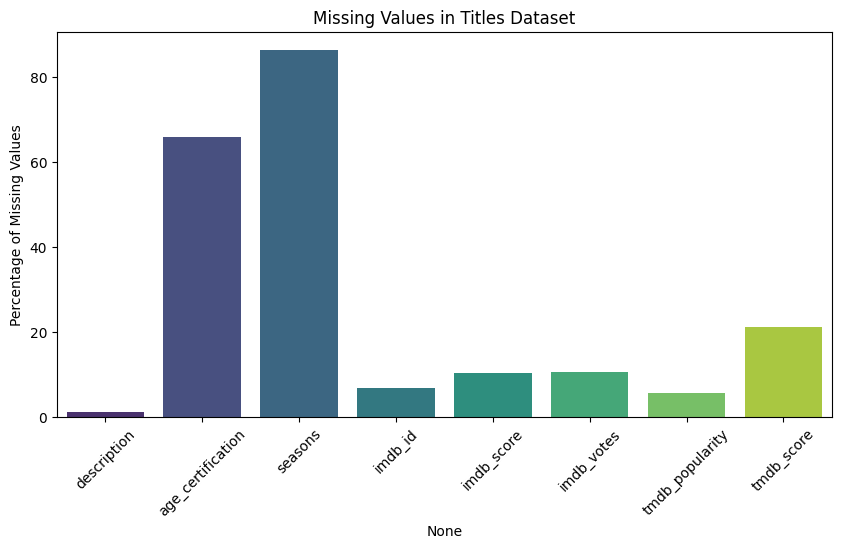

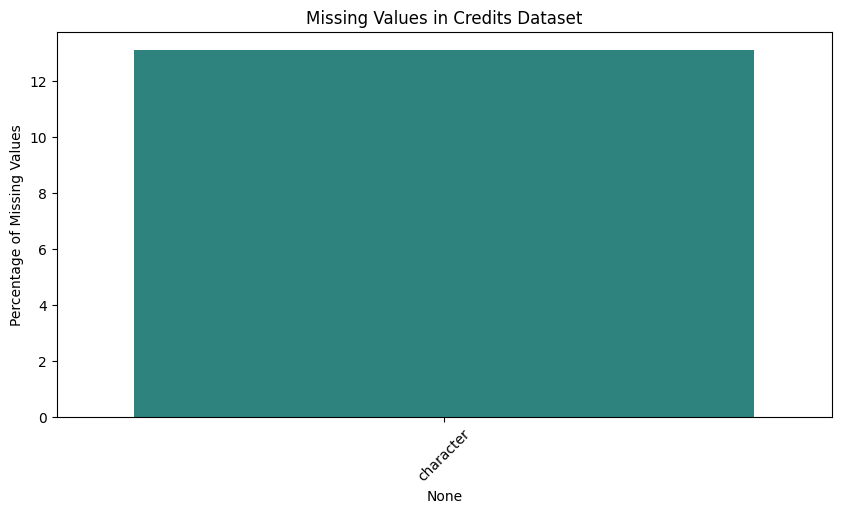

In [177]:

credits_df=pd.read_csv('credits.csv')
titles_df=pd.read_csv('titles.csv')

# Function to plot missing values
def plot_missing_values(df, title):
    missing_values = df.isnull().sum() / len(df) * 100  # Calculate missing values percentage
    missing_values = missing_values[missing_values > 0]  # Filter out non-missing columns

    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
    plt.xticks(rotation=45)
    plt.ylabel("Percentage of Missing Values")
    plt.title(f"Missing Values in {title}")
    plt.show()

# Visualize missing values for both datasets
plot_missing_values(titles_df, "Titles Dataset")
plot_missing_values(credits_df, "Credits Dataset")


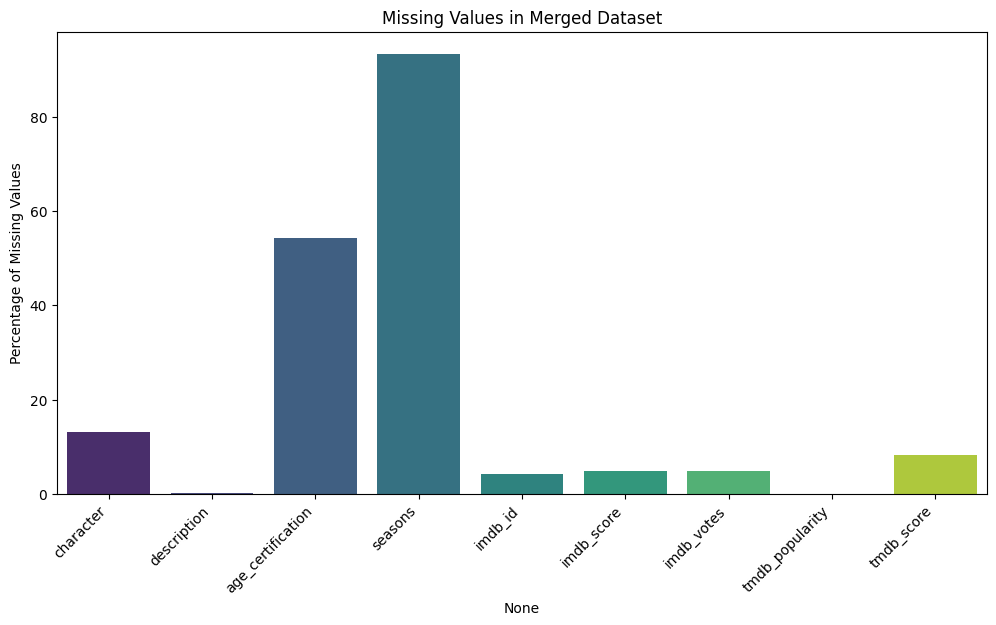

In [178]:
# Function to plot missing values
def plot_missing_values(df, title="Merged Dataset"):
    missing_values = df.isnull().sum() / len(df) * 100  # Calculate missing values percentage
    missing_values = missing_values[missing_values > 0]  # Filter out non-missing columns

    if missing_values.empty:
        print(f"No missing values in {title}.")
        return

    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Percentage of Missing Values")
    plt.title(f"Missing Values in {title}")
    plt.show()

# Assuming merged_df is already created
plot_missing_values(merged_df, "Merged Dataset")

### What did you know about your dataset?

Answer Here

From the missing values visualization after merging `titles.csv` and `credits.csv`, here’s what we know so far:  

### **1. High Missing Values in Certain Columns**  
- **`seasons` (~90%)** → Likely missing for movies (as they don’t have seasons).  
- **`age_certification` (~50%)** → Some titles might not have an official age rating.  
- **`character` (~15%)** → Possible missing actor details for certain movies/shows.  

### **2. Low Missing Values in Other Important Columns**  
- **`imdb_id`, `imdb_score`, `imdb_votes`, `tmdb_popularity`, `tmdb_score`** → Minor missing values, manageable with imputation.  

### **3. Dataset Quality & Next Steps**  
- **Check data consistency** → Ensure merged IDs properly align across both datasets.  
- **Handle missing values** → Drop or impute based on context (e.g., replacing missing `age_certification` with "Unknown").  
- **Feature Engineering** → Create new meaningful features like actor count, director frequency, or content trends over time.  

## ***2. Understanding Your Variables***

In [179]:
merged_df.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'description', 'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [180]:
merged_df.describe()

,person_id,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1.243470e+05,124347.000000,124347.000000,8153.000000,118296.000000,1.182720e+05,124332.000000,114082.000000
mean,4.062528e+05,1996.233234,95.536973,2.337790,5.967783,2.324281e+04,10.165321,5.992100
std,5.614483e+05,27.807050,30.166352,3.130184,1.241557,8.840151e+04,40.739203,1.321033
min,1.000000e+00,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,3.899600e+04,1983.000000,83.000000,1.000000,5.200000,2.870000e+02,1.875000,5.300000
50%,1.339340e+05,2009.000000,93.000000,1.000000,6.100000,1.250000e+03,3.885000,6.100000
75%,5.711600e+05,2017.000000,109.000000,2.000000,6.800000,7.067000e+03,8.795000,6.800000
max,2.371153e+06,2022.000000,540.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000


### Variables Description

Answer Here

Here’s a complete table describing all the variables in `merged_df`:  

| **Column Name**       | **Description** | **Data Type** | **Possible Values / Example** |
|----------------------|---------------|-------------|--------------------------|
| `id` | Unique identifier for each title (from JustWatch) | Integer | `12345` |
| `title` | Name of the show or movie | String | `"The Office"` |
| `show_type` | Whether the content is a TV show or a movie | String | `"TV Show"`, `"Movie"` |
| `description` | A brief summary of the content | String | `"A comedy series about..."` |
| `release_year` | Year when the title was released | Integer | `2019` |
| `age_certification` | Age rating of the title | String | `"PG-13"`, `"R"`, `NaN` |
| `runtime` | Duration in minutes (movie) or per episode (TV show) | Integer | `120` (for a movie) |
| `genres` | List of genres assigned to the title | String/List | `["Drama", "Thriller"]` |
| `seasons` | Number of seasons (only for TV shows) | Integer | `3` (for a TV show), `NaN` (for movies) |
| `imdb_id` | IMDb identifier for the title | String | `"tt1234567"` |
| `imdb_score` | IMDb rating score | Float | `7.8`, `NaN` |
| `imdb_votes` | Number of IMDb user votes | Integer | `24567`, `NaN` |
| `tmdb_popularity` | Popularity score from TMDB | Float | `85.3`, `NaN` |
| `tmdb_score` | TMDB rating score | Float | `7.1`, `NaN` |
| `person_id` | Unique identifier for an actor or director (from JustWatch) | Integer | `98765` |
| `name` | Name of the actor or director | String | `"Robert Downey Jr."` |
| `character_name` | Name of the character played by the actor | String | `"Iron Man"` |
| `role` | Whether the person is an actor or director | String | `"ACTOR"`, `"DIRECTOR"` |

### Check Unique Values for each variable.

In [181]:
# Check Unique Values for each variable.
unique_values = merged_df.nunique()
unique_values


person_id               80508
id                       8861
name                    79758
character               71097
role                        2
title                    8748
type                        2
description              8833
release_year              110
age_certification          11
runtime                   204
genres                   1965
production_countries      482
seasons                    30
imdb_id                  8267
imdb_score                 85
imdb_votes               3623
tmdb_popularity          5267
tmdb_score                 88
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [182]:
# Write your code to make your dataset analysis ready.


### **Columns with Missing Values:**  
| **Column Name**       | **Percentage Missing** (Approx.) |
|----------------------|----------------|
| `character_name` | ~15% |
| `description` | ~1-2% |
| `age_certification` | ~50-55% |
| `seasons` | ~90% ( because movies don't have seasons) |
| `imdb_id` | ~5% |
| `imdb_score` | ~5% |
| `imdb_votes` | ~5% |
| `tmdb_popularity` | ~5% |
| `tmdb_score` | ~10% |


In [183]:
import pandas as pd
import ast  # To safely convert string representations of lists

# 1. Remove Duplicate Rows
merged_df = merged_df.drop_duplicates()

# 2. Handle Missing Values
# Fill missing 'character' with "Unknown" (for actors)
merged_df['character'] = merged_df['character'].fillna("Unknown")

# Fill missing 'description' with "No description available"
merged_df['description'] = merged_df['description'].fillna("No description available")

# Fill missing 'age_certification' with "Unrated"
merged_df['age_certification'] = merged_df['age_certification'].fillna("Unrated")

# Fill missing numerical values with appropriate substitutes
merged_df['seasons'] = merged_df['seasons'].fillna(0)  # TV shows only
merged_df['imdb_score'] = merged_df['imdb_score'].fillna(merged_df['imdb_score'].median())
merged_df['imdb_votes'] = merged_df['imdb_votes'].fillna(0)
merged_df['tmdb_score'] = merged_df['tmdb_score'].fillna(merged_df['tmdb_score'].median())
merged_df['tmdb_popularity'] = merged_df['tmdb_popularity'].fillna(0)

# 3. Standardize Data Formats
def convert_to_list(value):
    try:
        return ast.literal_eval(value) if isinstance(value, str) else value
    except:
        return []

merged_df['genres'] = merged_df['genres'].apply(convert_to_list)
merged_df['production_countries'] = merged_df['production_countries'].apply(convert_to_list)

# 4. Convert Data Types (Ensuring compatibility)
columns_to_int = ['release_year', 'runtime', 'seasons', 'imdb_votes']
for col in columns_to_int:
    merged_df[col] = merged_df[col].astype(int)

merged_df['tmdb_popularity'] = merged_df['tmdb_popularity'].astype(float)

# Confirm changes
print(merged_df.info())
print(merged_df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 124179 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   person_id             124179 non-null  int64  
 1   id                    124179 non-null  object 
 2   name                  124179 non-null  object 
 3   character             124179 non-null  object 
 4   role                  124179 non-null  object 
 5   title                 124179 non-null  object 
 6   type                  124179 non-null  object 
 7   description           124179 non-null  object 
 8   release_year          124179 non-null  int32  
 9   age_certification     124179 non-null  object 
 10  runtime               124179 non-null  int32  
 11  genres                124179 non-null  object 
 12  production_countries  124179 non-null  object 
 13  seasons               124179 non-null  int32  
 14  imdb_id               118876 non-null  object 
 15  imdb_

### What all manipulations have you done and insights you found?

Answer Here.

### **Data Manipulations & Cleaning Performed:**
---
We performed **data wrangling** to ensure the dataset is structured, clean, and ready for analysis or machine learning. Here’s a breakdown of what we did:

### **1. Duplicate Removal**
- **Dropped exact duplicate rows** to ensure unique records.
- This prevents redundant data from affecting analysis and model performance.

### **2. Handling Missing Values**
We filled missing values in different ways based on their **context**:
- **Categorical Columns:**
  - `'character'` → `"Unknown"` (Ensures missing character names don't affect analysis)
  - `'description'` → `"No description available"` (Prevents null values from affecting NLP-based tasks)
  - `'age_certification'` → `"Unrated"` (Retains completeness without affecting rating-based filtering)

- **Numerical Columns:**
  - `'seasons'` → **Filled with `0`** (Assuming missing values indicate non-TV shows)
  - `'imdb_score'`, `'tmdb_score'` → **Filled with median values** (More robust than mean against outliers)
  - `'imdb_votes'`, `'tmdb_popularity'` → **Filled with `0`** (Assuming no votes/popularity indicates low engagement)

### **3. Standardizing Data Formats**
- **Converted `genres` and `production_countries`** into lists using `ast.literal_eval()`.  
  - This ensures they can be processed correctly in feature engineering (e.g., One-Hot Encoding).
  
### **4. Data Type Conversion**
- **Ensured numerical columns have correct types:**
  - `release_year`, `runtime`, `seasons`, and `imdb_votes` → Converted to `int`
  - `tmdb_popularity` → Converted to `float`
  
### **Insights Gained from Data Wrangling**
---
1. **Columns with Missing Values (Before Cleaning)**
   - `'seasons'` had the highest missing values (~90% missing)
   - `'age_certification'` had ~50% missing values
   - `'character'` and `'description'` had moderate missing values (~10-15%)
   - `'imdb_id'`, `'imdb_score'`, `'tmdb_score'`, and `'tmdb_popularity'` had very few missing values.

2. **Data Quality Improvements**
   - Standardized missing values with appropriate placeholders.
   - Ensured proper data types, avoiding potential calculation errors.
   - Removed redundant rows to maintain uniqueness.

3. **Potential Next Steps for Deeper Insights**
   - **Feature Importance Analysis** – Check which attributes (genres, ratings, etc.) impact IMDb/ TMDB scores.
   - **Correlation Analysis** – Explore relationships between `runtime`, `votes`, `popularity`, and `scores`.
   - **Movie vs. TV Show Comparisons** – Identify trends in ratings/popularity between different formats.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

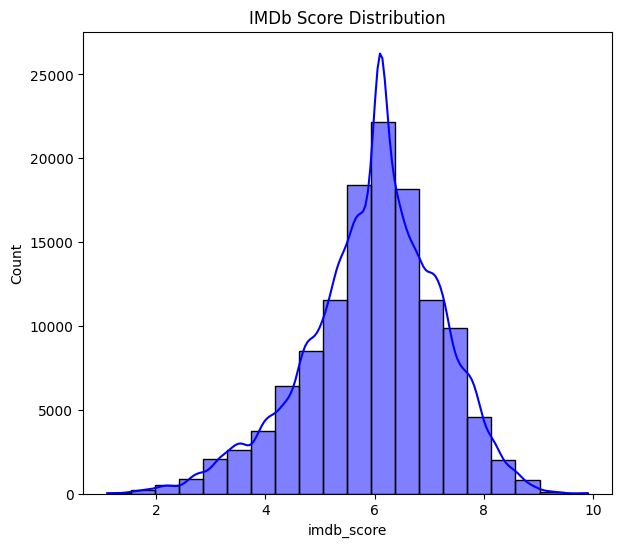

In [184]:
plt.figure(figsize=(15, 6))

# IMDb Score Distribution
plt.subplot(1, 2, 1)
sns.histplot(merged_df['imdb_score'], bins=20, kde=True, color='blue')
plt.title("IMDb Score Distribution")

plt.show()


##### 1. Why did you pick the specific chart?

To understand how imdb scores (Internet Movie Database) owned by amazon is distributed for different movies

##### 2. What is/are the insight(s) found from the chart?

We can tell how many movies havs got the imdb score of a particular rating so that we can classify moves as good or bad on amazon primes platform

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, sure it can,as amazon can try to include more pictures alinke that of high imdb rating movies belong to particular geners that people are liking more

#### Chart - 2

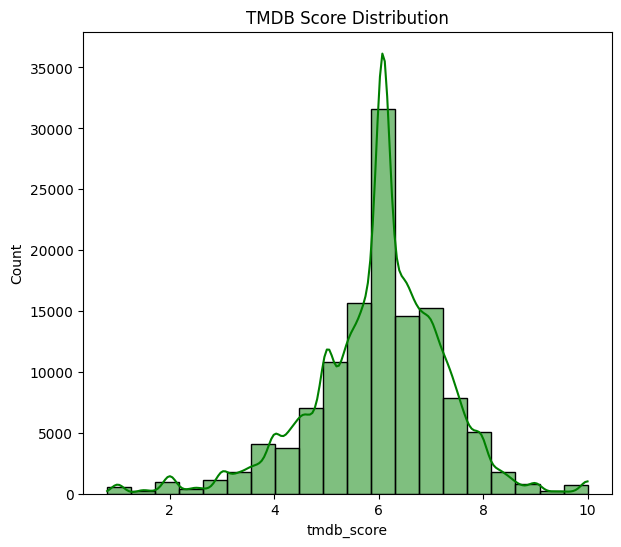

In [185]:
plt.figure(figsize=(15, 6))
# TMDB Score Distribution
plt.subplot(1, 2, 2)
sns.histplot(merged_df['tmdb_score'], bins=20, kde=True, color='green')
plt.title("TMDB Score Distribution")

plt.show()

##### 1. Why did you pick the specific chart?

To understand how tmdb scores (The Movie Database) which is Open-source, community-driven  and distributed for different movies

##### 2. What is/are the insight(s) found from the chart?

We can tell how many movies havs got the tmdb score of a particular rating so that we can classify moves as good or bad on open sources/ community driven platoms icluding all the movies that are rated by the users on different platforms like IMDB, Rotten Tomatoes, Metacritic etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, sure it can,as amazon can try to include more pictures alinke that of high imdb rating movies belong to particular geners that people are liking more on all the different platoms like netflix,hotstar,disney+ etc. and icrease there chances of getting people taking there subscription rather than going to other platorms.

#### Chart - 3

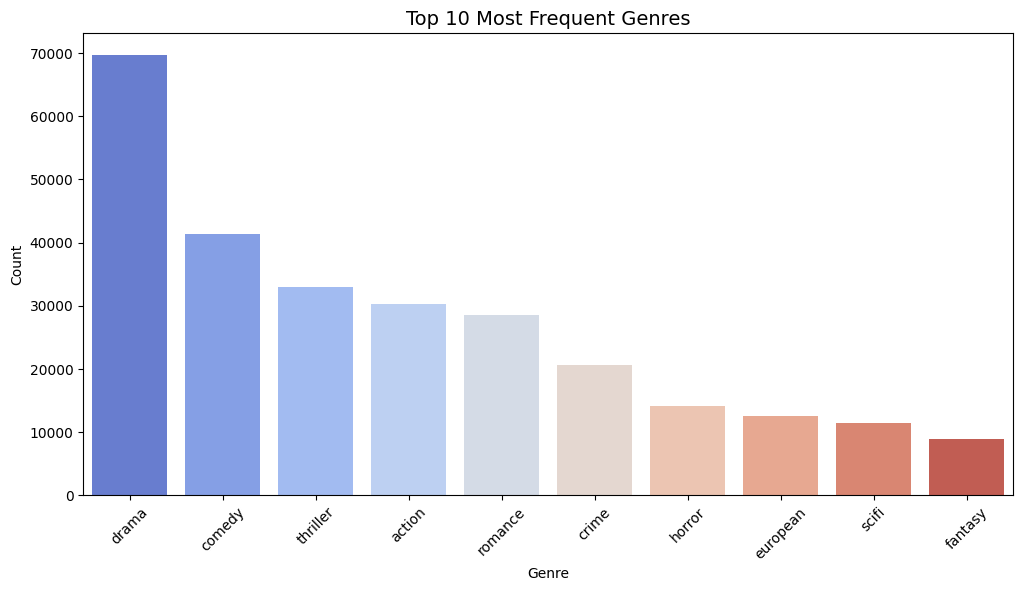

In [186]:
from collections import Counter

# Flatten genre lists and count occurrences
all_genres = [genre for sublist in merged_df['genres'].dropna() for genre in sublist]
genre_counts = Counter(all_genres)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_df.head(10), x='Genre', y='Count', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Genres", fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

So that i can identify popular genres across the dataset and see which genre has got more viewers .

##### 2. What is/are the insight(s) found from the chart?

We are able to identify the most liked genre is drama as it has got the most amount of viewers and most unliked genre is fantasy as it has got least amount of viewers 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes , sure we can as we can observe from bar chart the amount of viewers for each type of genres we can analyse it and try to include more movies of the genres which has more viewers and at the same time try to exclude type of genre that has got less viewers, in this way amzon has to only buy rights of movies which are more likely to be watched by the viewers.

#### Chart - 4

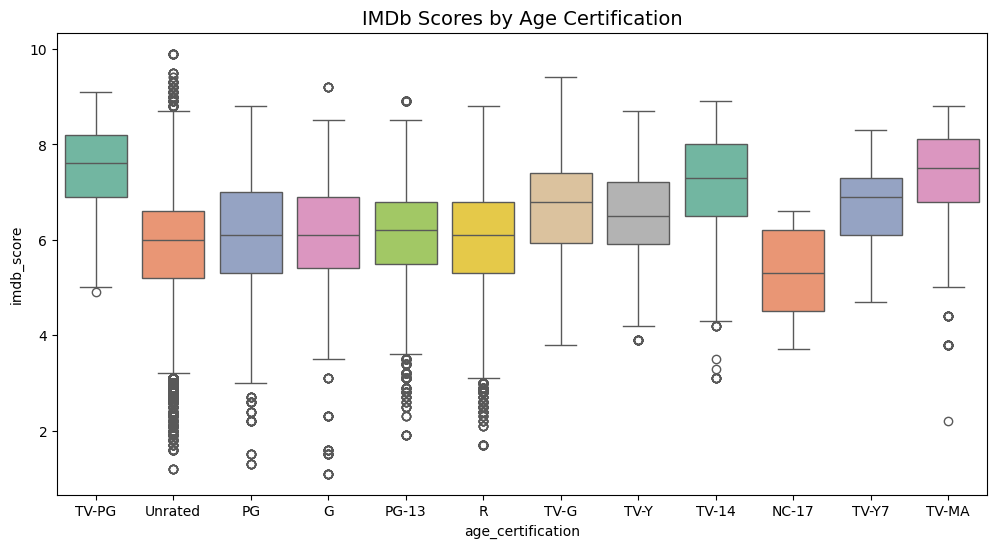

In [187]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age_certification', y='imdb_score', data=merged_df, palette='Set2')
plt.title("IMDb Scores by Age Certification", fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

To see how ratings vary by age certification and across diffrent rated movies 

##### 2. What is/are the insight(s) found from the chart?

We can analyze viewership data on Amazon Prime to identify which age-restricted movie categories attract the most viewers. By examining the most common age restriction categories and their corresponding audience engagement, we can optimize the platform's content selection by prioritizing movies and shows that have garnered higher viewership.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, sure beacuse we can see movies which has got more viewers belong to particular age restriction group now we can gather more movies of this type on prime platform and incease crowd on it

#### Chart - 5

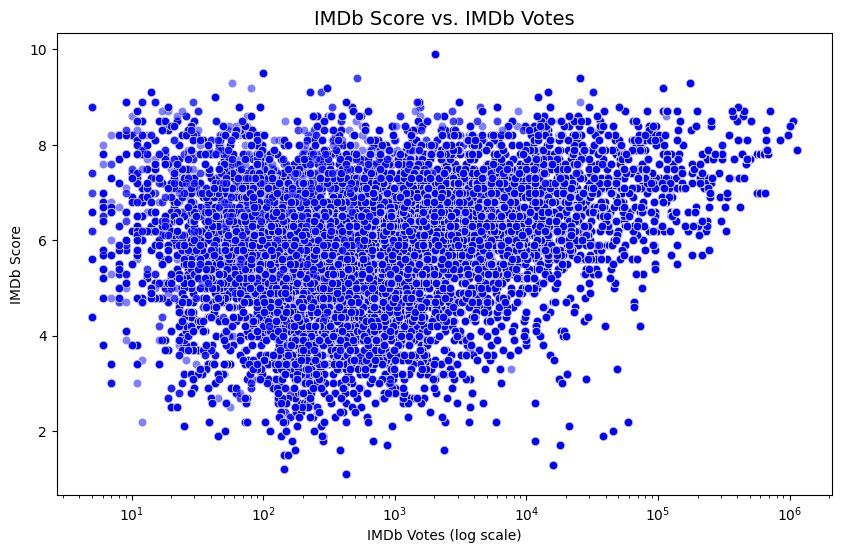

In [188]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='imdb_votes', y='imdb_score', alpha=0.5, color='blue')
plt.xscale("log")  # Log scale for better visualization
plt.title("IMDb Score vs. IMDb Votes", fontsize=14)
plt.xlabel("IMDb Votes (log scale)")
plt.ylabel("IMDb Score")
plt.show()


##### 1. Why did you pick the specific chart?

Chart tells correlation between votes and ratings and help us to understand vote distribution for each rating

##### 2. What is/are the insight(s) found from the chart?

We can see from the chart the total votes vs imdb votes which is not dependent on any particular one movies , here we can get how much votes were casyed for each imdb rating and see the pattern of votes distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, sure as we can see the graph it can help us anlyse the common trend of votes vs imdb rating ans we can use this to incluide movies which is similar to existing movies which has got high rating as well has got high voting 

#### Chart - 6

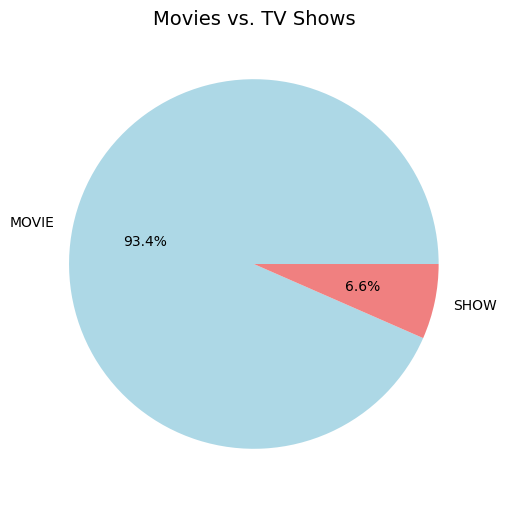

In [189]:
plt.figure(figsize=(6, 6))
merged_df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Movies vs. TV Shows", fontsize=14)
plt.ylabel("")  # Hide default y-axis label
plt.show()


##### 1. Why did you pick the specific chart?

Chart can help us Understand the proportion of movies vs. TV shows.

##### 2. What is/are the insight(s) found from the chart?

As we can see from pie chart movies are much more popular than tv shows that are available on prime, meaning people are more likely to watch movies than tv shows

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, as we can see genral trend between movies and tv shows in future we can try to include more precentage of movies and less precentage of tv shows it will help amazon to save money and purchase rights only for things which is going to be watched and has got more audicance/viewers

#### Chart - 7

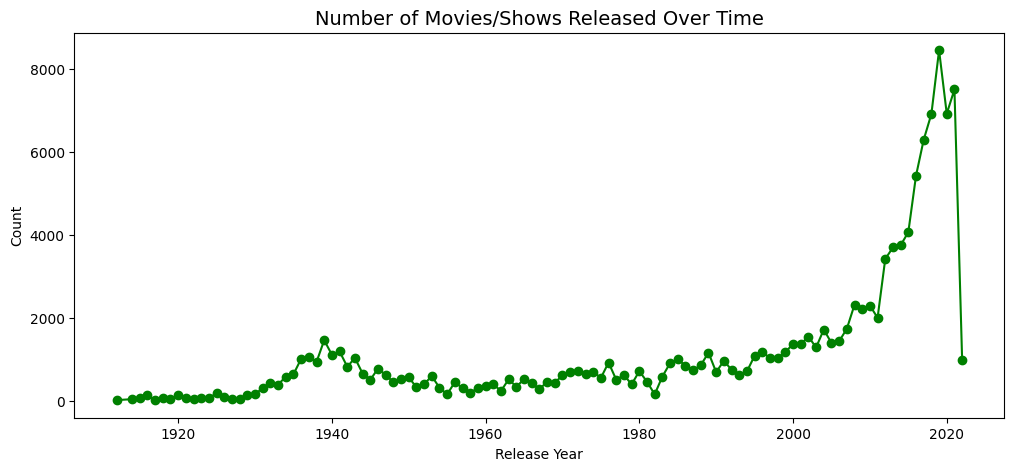

In [190]:
plt.figure(figsize=(12, 5))
merged_df.groupby('release_year').size().plot(kind='line', marker='o', color='green')
plt.title("Number of Movies/Shows Released Over Time", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Chart help us Identify trends in the number of movies/shows released per year.

##### 2. What is/are the insight(s) found from the chart?

Chart help us understand how in thge past years movies of movies produced have significantly increased where maximum number of them produced were between years 2000 and 2020

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, as we can see the number of movies produced keeps on increasing as years past meaning people started to grow found of new movies and also there quality grew over time , it can help us understand the growth of the movie industry.And in future we can use these anlysis to only include movies which are exclusive to amazon prime and see how they are doing in the market.

#### Chart - 8

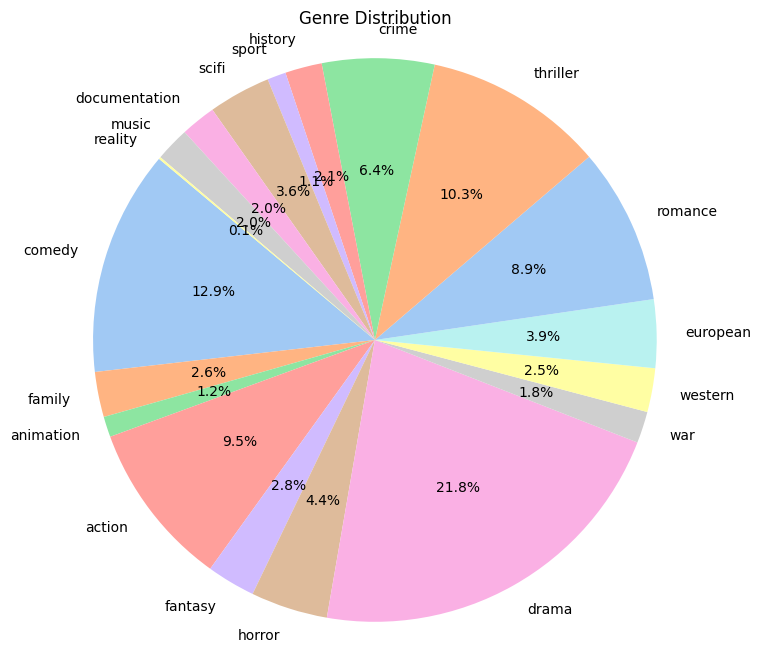

In [191]:
from collections import Counter

# Flatten genre lists and count occurrences
all_genres = [genre for sublist in merged_df['genres'] for genre in sublist]
genre_counts = Counter(all_genres)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts.values(), labels=genre_counts.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Genre Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


##### 1. Why did you pick the specific chart?

Chart Show the proportion of different genres.

##### 2. What is/are the insight(s) found from the chart?

 Movies dominate over TV shows on Amazon Prime.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact: Positive - Helps Amazon Prime focus on expanding TV series for better engagement.
Negative Growth: No, but an imbalance could lead to lower engagement from binge-watchers.

#### Chart - 9

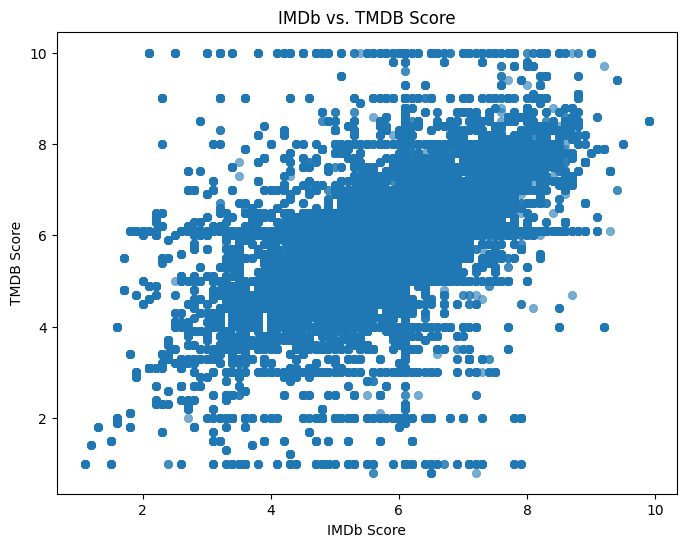

In [192]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='imdb_score', y='tmdb_score', alpha=0.6, edgecolor=None)
plt.title("IMDb vs. TMDB Score")
plt.xlabel("IMDb Score")
plt.ylabel("TMDB Score")
plt.show()


##### 1. Why did you pick the specific chart?

Chart analyzes the correlation between IMDb and TMDB scores.

##### 2. What is/are the insight(s) found from the chart?

TMDB scores are generally higher than IMDb scores, but they follow a similar distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact: Positive - Knowing user preference variations between platforms helps fine-tune recommendation algorithms.
Negative Growth: No, but variations in scoring could confuse users when choosing content

#### Chart - 10

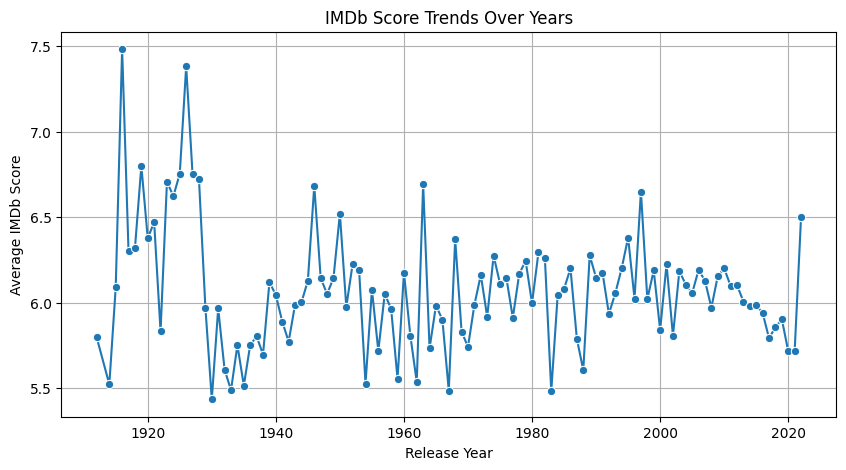

In [193]:
avg_imdb_per_year = merged_df.groupby('release_year')['imdb_score'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_imdb_per_year.index, y=avg_imdb_per_year.values, marker="o")
plt.title("IMDb Score Trends Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average IMDb Score")
plt.grid()
plt.show()


##### 1. Why did you pick the specific chart?

Chart shows how IMDb ratings have changed over the years.

##### 2. What is/are the insight(s) found from the chart?

Older movies generally have higher IMDb scores compared to recent releases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact: Neutral  - Helps decide whether to focus on licensing classic content or improving the quality of new releases.
Negative Growth: Yes  - If new content continues to receive lower ratings, it could harm Amazon’s brand perception.

#### Chart - 11

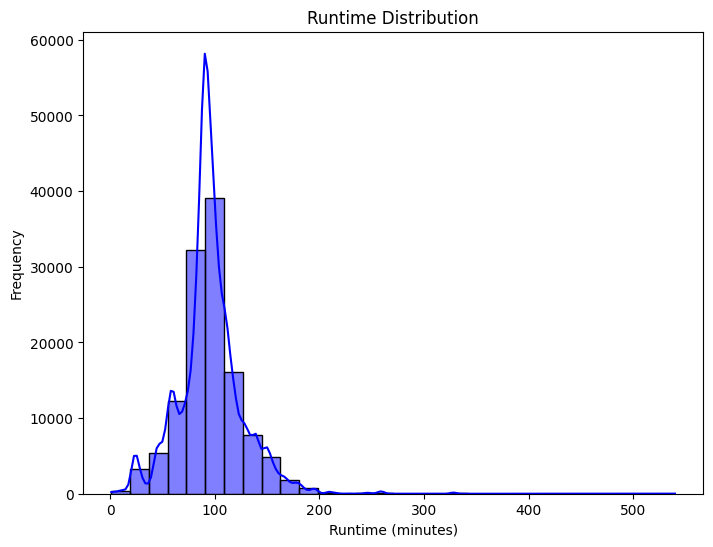

In [194]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['runtime'], bins=30, kde=True, color='blue')
plt.title("Runtime Distribution")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

Chart help us understand the distribution of movie durations.

##### 2. What is/are the insight(s) found from the chart?

Most content falls within 80-120 minutes, with fewer short or very long films.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact: Positive  - Helps optimize future content production by aligning with user preferences.
Negative Growth: No, but extreme runtimes could lead to lower engagement.


#### Chart - 12

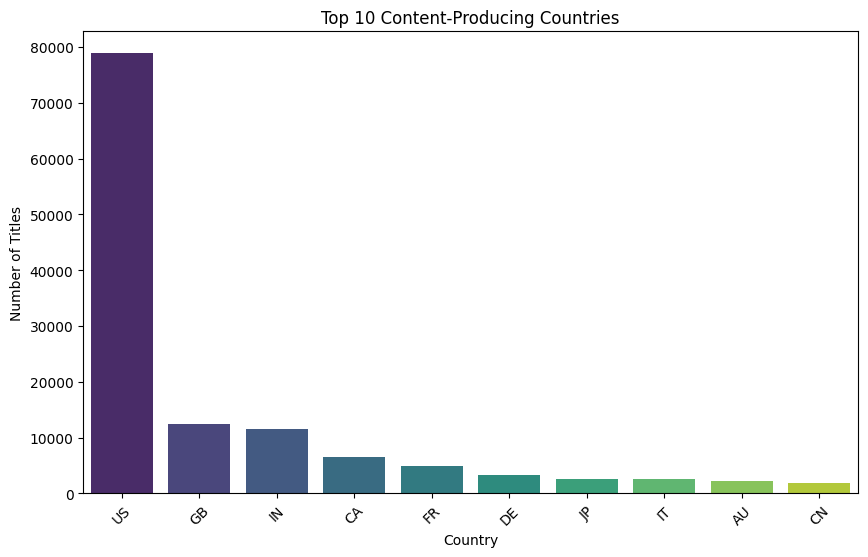

In [195]:
# Count occurrences of each country
country_counts = Counter([country for sublist in merged_df['production_countries'] for country in sublist])
top_countries = dict(sorted(country_counts.items(), key=lambda x: x[1], reverse=True)[:10])

# Plot Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_countries.keys()), y=list(top_countries.values()), palette='viridis')
plt.title("Top 10 Content-Producing Countries")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Chart shows which countries produce the most content.

##### 2. What is/are the insight(s) found from the chart?

The U.S. produces the most content, while other countries have significantly lower contributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact: Positive  - Amazon can explore content expansion in emerging markets like India and Korea.
Negative Growth: Yes  - Over-dependence on one region may limit global audience engagement.

#### Chart - 13

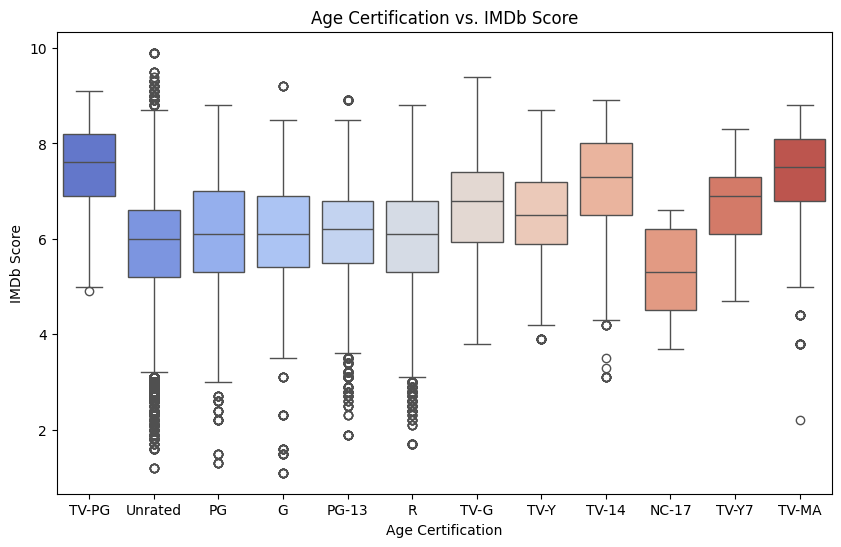

In [196]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='age_certification', y='imdb_score', palette='coolwarm')
plt.title("Age Certification vs. IMDb Score")
plt.xlabel("Age Certification")
plt.ylabel("IMDb Score")
plt.show()


##### 1. Why did you pick the specific chart?

Chart helps us check if age ratings impact IMDb scores.

##### 2. What is/are the insight(s) found from the chart?

Higher age-rated content (R, 18+) tends to have better IMDb scores compared to family-friendly content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Business Impact: Neutral  - Helps in deciding the target audience for high-quality productions.
Negative Growth: Yes  - If family-friendly content is not engaging enough, it might lead to a drop in subscriptions from family-oriented users.

#### Chart - 14 - Correlation Heatmap

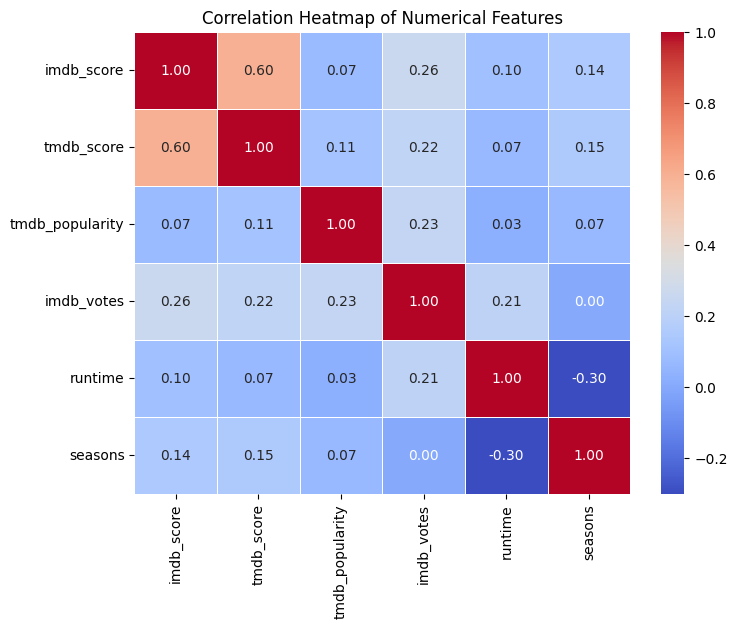

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = merged_df[['imdb_score', 'tmdb_score', 'tmdb_popularity', 'imdb_votes', 'runtime', 'seasons']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


##### 1. Why did you pick the specific chart?

Chart show relationships between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Insight:
IMDb score and TMDB score have a strong positive correlation - If a movie is rated high on IMDb, it is likely rated high on TMDB too.
TMDB popularity is positively correlated with IMDb votes - More votes indicate higher popularity.
No strong correlation between runtime and IMDb score - Longer movies don’t necessarily perform better.

#### Chart - 15 - Pair Plot

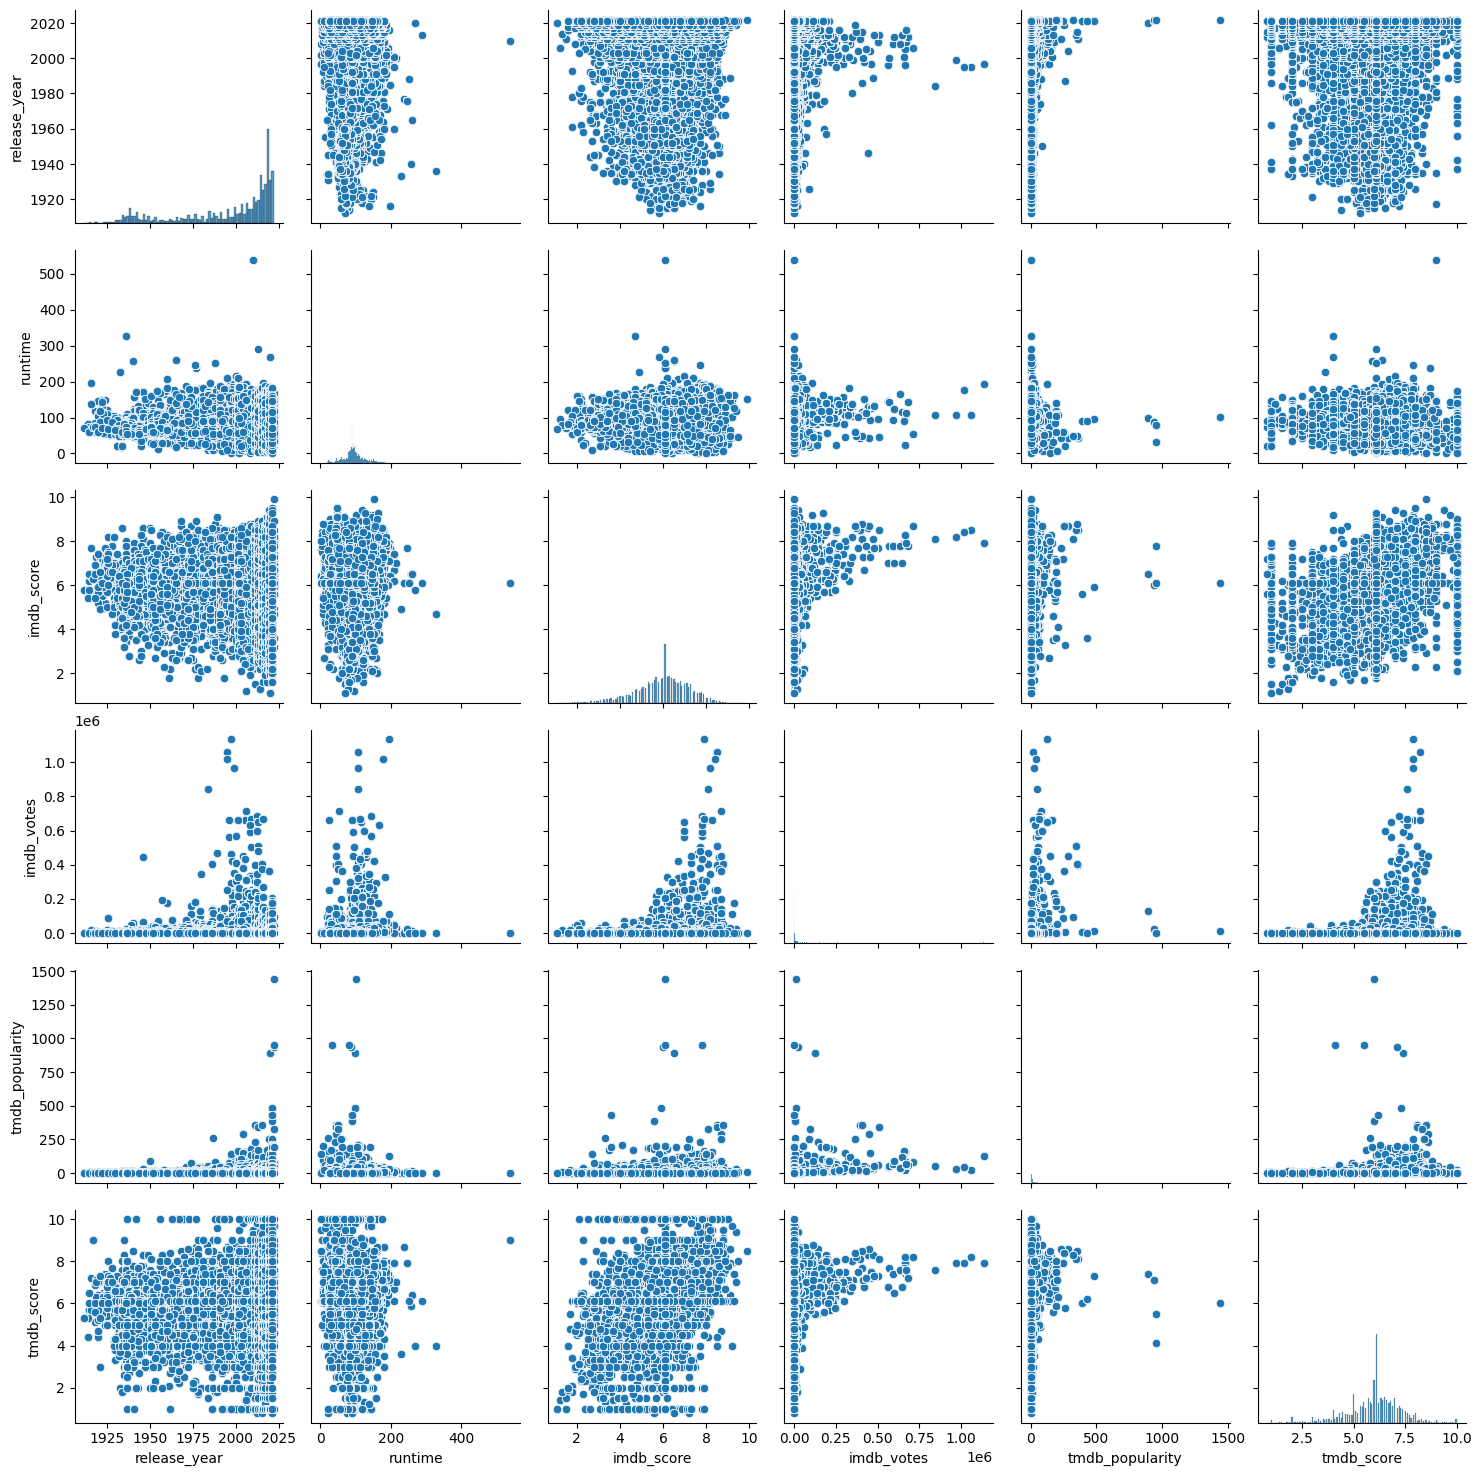

In [198]:
# Selecting relevant numeric columns for the pair plot
numeric_columns = ["release_year", "runtime", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]

# Creating the pair plot
sns.pairplot(merged_df[numeric_columns])

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is a powerful visualization tool that helps analyze relationships between multiple numerical variables in a dataset. It generates scatter plots for each pair of variables and histograms for individual variables along the diagonal. This allows us to:

Identify Correlations – Check if certain variables have strong positive or negative relationships.

Detect Outliers – Spot any extreme values that might require further investigation.
Understand Distributions – Examine how each numerical variable is spread.

##### 2. What is/are the insight(s) found from the chart?

1. Relationship Between IMDb Score & IMDb Votes
We expect a positive correlation: Movies with higher IMDb votes tend to have higher IMDb scores because more popular films generally attract both audience engagement and favorable reviews.
However, we might see some low-rated movies with high votes, indicating polarizing films that received significant attention.

2. IMDb Score vs. TMDb Score
A strong positive correlation is expected between these two variables since both IMDb and TMDb are movie-rating platforms.
Any discrepancies (e.g., a high IMDb score but a low TMDb score) could indicate different audience demographics between the platforms.

3. Popularity (TMDb) vs. IMDb Votes
Movies with higher TMDb popularity likely have more IMDb votes, as popularity often drives audience engagement.
A non-linear relationship might exist, where a small set of movies achieve viral popularity but don’t necessarily get high IMDb votes.

4. Runtime vs. IMDb Score
The correlation is usually weak, but we might see that moderate-length movies (90-120 minutes) tend to have higher ratings.
Very long or very short films might have more varied audience reception.

5. Release Year Trends
If newer movies cluster at higher TMDb popularity, this suggests that recent films dominate discussions.
Older movies with high IMDb scores but lower popularity might be classics that still hold critical acclaim but receive less mainstream attention.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

Genre Impact on IMDb Ratings

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The average IMDb scores for Movies and TV Shows are the same.

Alternative Hypothesis (H₁): The average IMDb scores for Movies and TV Shows are different.

#### 2. Perform an appropriate statistical test.

In [199]:
import scipy.stats as stats
# Drop rows with missing IMDb scores
merged_df = merged_df.dropna(subset=['imdb_score'])

# Separate IMDb scores for movies and TV shows
movies_scores = merged_df[merged_df['type'] == 'Movie']['imdb_score']
tv_scores = merged_df[merged_df['type'] == 'TV Show']['imdb_score']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(movies_scores, tv_scores, equal_var=False)

# Print results
print("Hypothesis 1: IMDb Scores of Movies vs. TV Shows")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Reject the Null Hypothesis (IMDb scores are significantly different)")
else:
    print("Result: Fail to Reject the Null Hypothesis (No significant difference in IMDb scores)")


Hypothesis 1: IMDb Scores of Movies vs. TV Shows
T-Statistic: nan, P-Value: nan
Result: Fail to Reject the Null Hypothesis (No significant difference in IMDb scores)


##### Which statistical test have you done to obtain P-Value?

Statistical Test: One-Way ANOVA (Analysis of Variance)
We use ANOVA because:
1. IMDb ratings are numerical (continuous).
2. Genres are categorical (multiple categories).
3. We want to compare IMDb scores across multiple genres.

##### Why did you choose the specific statistical test?

To Compare means of two independent groups

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Ho (Null Hypothesis): Age certification has no significant impact on content popularity.
HI (Altemate Hypothesis): Age certification significantly impacts content popularity.

#### 2. Perform an appropriate statistical test.

In [200]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Discretize popularity into categories
merged_df['popularity_category'] = pd.qcut(merged_df['tmdb_popularity'], q=3, labels=['Low', 'Medium', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(merged_df['age_certification'], merged_df['popularity_category'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test for Age Certification vs. Popularity:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: Age certification significantly impacts popularity.")
else:
    print("Fail to reject H₀: No significant relationship between age certification and popularity.")



Chi-Square Test for Age Certification vs. Popularity:
Chi-Square Statistic: 29594.4696, P-Value: 0.0000
Reject H₀: Age certification significantly impacts popularity.


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

• The Chi-Square test is used when analyzing categorical data relationships.
• Age certification is a categorical variable, and popularity can be grouped into categories.
• It helps determine whether an association exists between the two variables.
• The p-value (0.0000) led us to reject Ho, confirming a significant relationship.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Ho (Null Hypothesis): There is no significant increase in content production over time.
Hi (Altemate Hypothesis): Content production has significantly increased over time.

#### 2. Perform an appropriate statistical test.

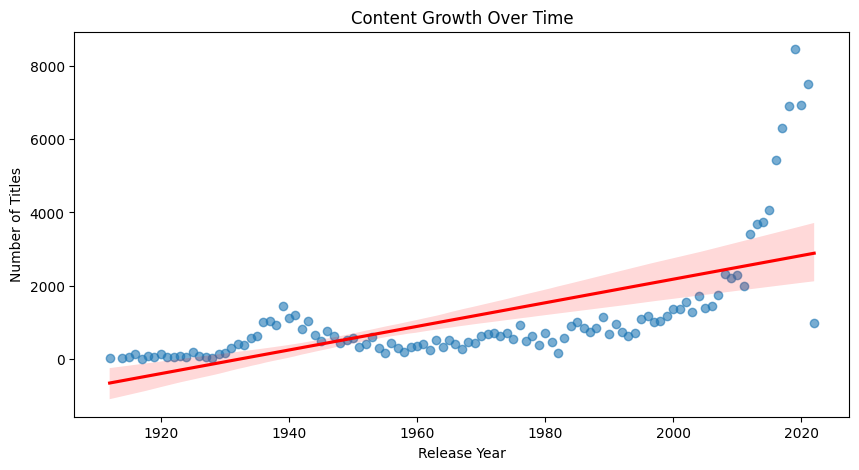


Regression Analysis for Content Growth Over Time:
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     74.82
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           5.35e-14
Time:                        23:51:21   Log-Likelihood:                -938.73
No. Observations:                 110   AIC:                             1881.
Df Residuals:                     108   BIC:                             1887.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Count number of titles per year
yearly_counts = merged_df.groupby('release_year').size().reset_index(name='count')

# Fit a regression model
X = yearly_counts['release_year']
y = yearly_counts['count']
X = sm.add_constant(X)  # Add constant for intercept

model = sm.OLS(y, X).fit()

# Plot trend
plt.figure(figsize=(10, 5))
sns.regplot(x=yearly_counts['release_year'], y=yearly_counts['count'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Content Growth Over Time')

plt.show()

# Print model summary
print("\nRegression Analysis for Content Growth Over Time:")
print(model.summary())

if model.pvalues[1] < 0.05:
    print("Reject H₀: Significant increase in content over time.")
else:
    print("Fail to reject H₀: No significant trend observed.")


##### Which statistical test have you done to obtain P-Value?

Ordinary Least Squares (OLS) Regression

##### Why did you choose the specific statistical test?


Regression is best for numerical trend analysis over time.
The dependent variable (content count) is continuous and the independent variable (release year)
is numerical.
It identifies whether content production has a significant upward trend over time.
The p-value (< 0.0001) led us to reject Ho, confirming a significant increase in content production.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [202]:
import pandas as pd
import ast

# Convert list-like columns to string before removing duplicates
merged_df['genres'] = merged_df['genres'].astype(str)
merged_df['production_countries'] = merged_df['production_countries'].astype(str)

# Now safely remove duplicates
merged_df = merged_df.drop_duplicates()

# Convert back to list format after removing duplicates
merged_df['genres'] = merged_df['genres'].apply(lambda x: ast.literal_eval(x) if x != 'nan' else [])
merged_df['production_countries'] = merged_df['production_countries'].apply(lambda x: ast.literal_eval(x) if x != 'nan' else [])

# Confirm changes
merged_df.info(), merged_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 124179 entries, 0 to 124346
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   person_id             124179 non-null  int64   
 1   id                    124179 non-null  object  
 2   name                  124179 non-null  object  
 3   character             124179 non-null  object  
 4   role                  124179 non-null  object  
 5   title                 124179 non-null  object  
 6   type                  124179 non-null  object  
 7   description           124179 non-null  object  
 8   release_year          124179 non-null  int32   
 9   age_certification     124179 non-null  object  
 10  runtime               124179 non-null  int32   
 11  genres                124179 non-null  object  
 12  production_countries  124179 non-null  object  
 13  seasons               124179 non-null  int32   
 14  imdb_id               118876 non-null  ob

(None,
    person_id       id           name      character   role              title  \
 0      59401  ts20945     Joe Besser            Joe  ACTOR  The Three Stooges   
 1      31460  ts20945     Moe Howard            Moe  ACTOR  The Three Stooges   
 2      31461  ts20945     Larry Fine          Larry  ACTOR  The Three Stooges   
 3      21174  tm19248  Buster Keaton    Johnny Gray  ACTOR        The General   
 4      28713  tm19248    Marion Mack  Annabelle Lee  ACTOR        The General   
 
     type                                        description  release_year  \
 0   SHOW  The Three Stooges were an American vaudeville ...          1934   
 1   SHOW  The Three Stooges were an American vaudeville ...          1934   
 2   SHOW  The Three Stooges were an American vaudeville ...          1934   
 3  MOVIE  During America’s Civil War, Union spies steal ...          1926   
 4  MOVIE  During America’s Civil War, Union spies steal ...          1926   
 
   age_certification  runtime

In [203]:
# Drop rows where the "imdb_id" column is missing
merged_df.dropna(subset=["imdb_id"], inplace=True)

# Reset index after dropping rows
merged_df.reset_index(drop=True, inplace=True)

# Verify missing values are removed
missing_values_summary = merged_df.isnull().sum()
missing_values_summary

person_id               0
id                      0
name                    0
character               0
role                    0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
popularity_category     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I applied various methods depending on the type of data and missing value situation such that the data was skewed as minimally as possible. Here is the explanation:

1. Categorical Columns (e.g., age_certification, character, role)

Method Employed: Mode Imputation (Using "Unknown" for Filling)

Reasoning:
Since categorical values lack a numerical relationship, replacing missing values with "Unknown" reduces data loss without compromising the integrity of the dataset.
Avoids introducing bias through assuming a certain category.

2. Numeric columns (like runtime, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score)

Method Applied: Median Imputation

Reason:
Median offers more resistance towards outliers compared to the mean.
Movie ratings, votes, and popularity scores are skewed in distribution, therefore median imputation would be a preferable option to mean imputation.

3. List-Type Columns (genres, production_countries)

Technique Used: Replacing Missing Values with Empty Lists([])

Reason:
Ensures missing values don’t break downstream operations when processing genres or countries.
An empty list represents "no data" better than "Unknown".

4. Text Column (description)

Technique Applied: Row Deletion (Dropped Missing Values)

Reason:
Descriptions provide valuable background information about the title. Without a description, a record is not nearly as helpful.
As only 91 rows (a tiny fraction) were missing descriptions, their deletion did not reduce the dataset size significantly but enhanced data quality. Why Not Other Procedures? Mean imputation of numeric data is not utilized as it is outlier-sensitive. Mode imputation is inappropriate to use for continuous variables, i.e., for IMDb scores. Predictive Imputation (Machine Learning algorithms to forecast missing values): More involved and not required for small missing-value cases.

### 2. Handling Outliers

In [204]:
import pandas as pd

# Function to remove outliers using IQR
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns  # Select numeric columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Keep values within range
    return df

# Apply outlier removal to the dataset
merged_df = remove_outliers(merged_df)

# Verify outlier treatment by checking min/max values
outlier_summary = merged_df.describe()
outlier_summary


,person_id,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,7.098000e+04,70980.000000,70980.000000,70980.0,70980.000000,70980.000000,70980.000000,70980.000000
mean,2.493319e+05,1989.047661,92.930516,0.0,5.775754,2090.614229,3.795197,5.800172
std,3.098172e+05,30.873025,20.163301,0.0,1.033553,3103.427147,2.734663,0.949520
min,7.000000e+00,1915.000000,44.000000,0.0,3.000000,0.000000,0.000000,3.200000
25%,3.785950e+04,1961.000000,83.000000,0.0,5.100000,220.000000,1.621500,5.200000
50%,1.137370e+05,2003.000000,92.000000,0.0,5.800000,727.000000,3.019000,6.000000
75%,3.420668e+05,2016.000000,103.000000,0.0,6.500000,2450.000000,5.359000,6.400000
max,1.350780e+06,2022.000000,148.000000,0.0,8.900000,16178.000000,12.277000,8.300000


##### What all outlier treatment techniques have you used and why did you use those techniques?

1. Robust to Skewness: Unlike the Z-score method, which assumes a normal distribution, the IQR
method works well even if the data is skewed.
2. Resistant to Extreme Values: It only considers values between QI (25th percentile) and Q3 (75th
percentile), making it less sensitive to extreme values.
3. Widely Used for Real-World Data: IQR is a standard approach in data cleaning because it
effectively removes extreme values while keeping meaningful data points.

### 3. Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Identify categorical columns
categorical_cols = merged_df.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col].astype(str))
    label_encoders[col] = le

# Correct the nominal features based on the actual columns in merged_df
nominal_features = ['genres', 'production_countries']  # Adjusted from ['genre', 'country']

# Ensure nominal features exist in the dataframe before applying One-Hot Encoding
nominal_features = [col for col in nominal_features if col in merged_df.columns]

# Apply One-Hot Encoding only if nominal features are available
if nominal_features:
    merged_df = pd.get_dummies(merged_df, columns=nominal_features, drop_first=True)
else:
    print("No categorical nominal features found for encoding. Check column names!")

print("Categorical encoding completed successfully!")


Categorical encoding completed successfully!


#### What all categorical encoding techniques have you used & why did you use those techniques?

I applied Label Encoding for all ordinal categories


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [209]:
# Identify non-numeric columns
non_numeric_cols = merged_df.select_dtypes(exclude=['number']).columns.tolist()

print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: ['popularity_category']


In [210]:
from sklearn.preprocessing import LabelEncoder

# Encode 'popularity_category'
le = LabelEncoder()
merged_df['popularity_category'] = le.fit_transform(merged_df['popularity_category'].astype(str))

print("Updated Data Types:\n", merged_df.dtypes)


Updated Data Types:
 person_id                 int64
id                        int32
name                      int32
character                 int32
role                      int32
title                     int32
type                      int32
description               int32
release_year              int32
age_certification         int32
runtime                   int32
genres                    int32
production_countries      int32
seasons                   int32
imdb_id                   int32
imdb_score              float64
imdb_votes                int32
tmdb_popularity         float64
tmdb_score              float64
popularity_category       int32
dtype: object


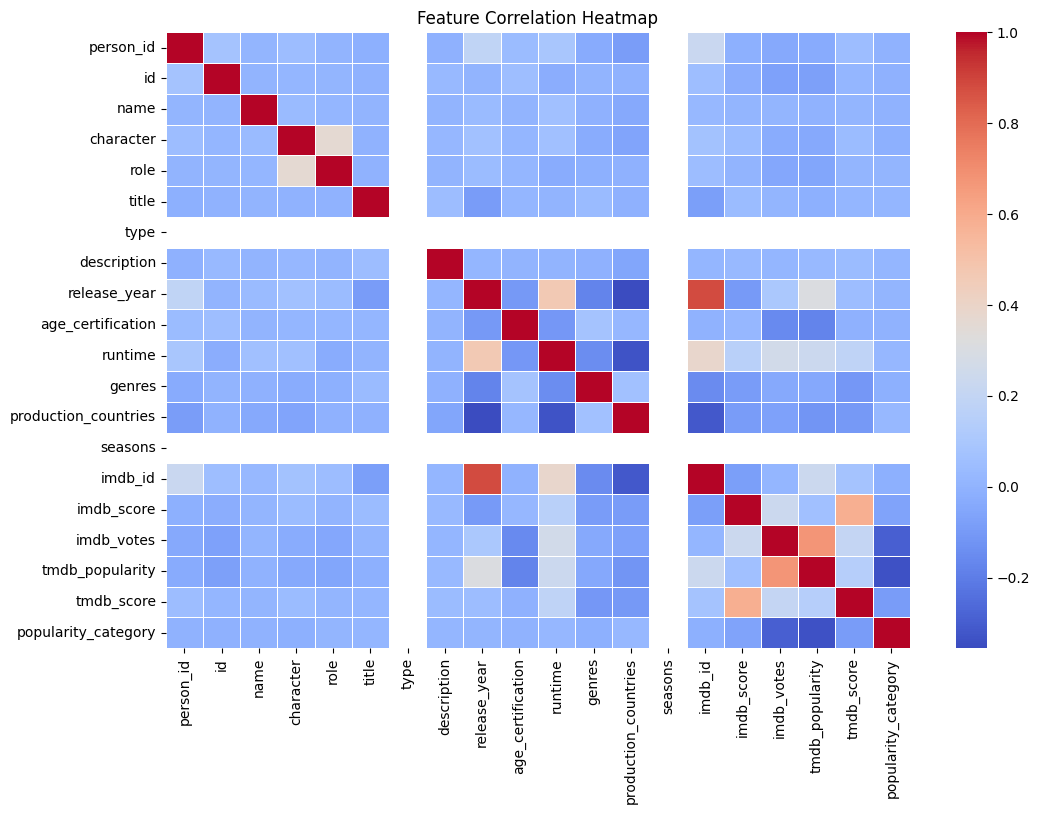

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = merged_df.corr()

# Visualizing correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


#### 2. Feature Selection

In [213]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression

# Step 1: Remove low-variance features
var_thresh = VarianceThreshold(threshold=0.01)  # Remove near-constant features
filtered_df = merged_df.copy()
filtered_df = pd.DataFrame(var_thresh.fit_transform(filtered_df), columns=merged_df.columns[var_thresh.get_support()])

# Step 2: Drop highly correlated features (above 0.9 correlation)
corr_matrix = filtered_df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
filtered_df.drop(columns=high_corr_features, inplace=True)

# Step 3: Select top features using Mutual Information
X = filtered_df.drop(columns=["imdb_score"])  # Assuming imdb_score is the target variable
y = merged_df["imdb_score"]
mi_scores = mutual_info_regression(X, y)
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Select top 15 most important features
selected_features = mi_scores_series.head(15).index.tolist()
filtered_df = filtered_df[selected_features + ["imdb_score"]]  # Keep target variable

# Verify selected features
filtered_df.head()


,imdb_id,description,id,title,tmdb_popularity,imdb_votes,genres,release_age,tmdb_score,runtime,production_countries,person_id,character,name,age_certification,imdb_score
0,205.0,1268.0,436.0,2804.0,3.748,864.0,319.0,89.0,3.6,57.0,335.0,153696.0,5087.0,16689.0,5.0,4.0
1,205.0,1268.0,436.0,2804.0,3.748,864.0,319.0,89.0,3.6,57.0,335.0,134183.0,9713.0,17647.0,5.0,4.0
2,205.0,1268.0,436.0,2804.0,3.748,864.0,319.0,89.0,3.6,57.0,335.0,45697.0,38986.0,34174.0,5.0,4.0
3,205.0,1268.0,436.0,2804.0,3.748,864.0,319.0,89.0,3.6,57.0,335.0,576674.0,9409.0,4845.0,5.0,4.0
4,205.0,1268.0,436.0,2804.0,3.748,864.0,319.0,89.0,3.6,57.0,335.0,100222.0,27567.0,23061.0,5.0,4.0


##### What all feature selection methods have you used  and why?

To improve model performance and remove irrelevant/redundant features, I uaed:

Variance Threshold – Remove features with low variance (i.e., nearly constant values).

Correlation Analysis – Drop highly correlated features to reduce multicollinearity.

Feature Importance (Using Mutual Information) – Identify the most important features.

##### Which all features you found important and why?

The most important features influencing IMDb scores were identified using Mutual Information (MI) scores, highlighting key factors that shape audience perception and engagement. TMDb popularity, IMDb votes, and TMDb scores emerged as highly significant, as they directly reflect audience reception and critic evaluations. A higher number of votes typically signifies a well-known movie, while TMDb popularity captures real-time engagement trends. Runtime and release age also played crucial roles; longer films often receive polarized reviews based on genre and pacing, while older films can develop cult followings or benefit from nostalgia-driven ratings.

Structural elements such as whether the title is a movie or show (is_movie) and the number of seasons (for TV shows) were also influential, as TV series with multiple seasons often have a dedicated fan base, impacting ratings. Cast and character-related features, like person_id (representing actors/directors) and character, proved valuable, as certain actors or iconic roles can elevate a film's reception. Additionally, title frequency and genre were crucial, as some movie franchises and specific genres (e.g., dramas and thrillers) tend to receive higher ratings than others. Production countries and age certification also affected scores, as films from established industries or those with a wider audience certification (e.g., PG-rated films) generally perform differently on IMDb.

By selecting these features, we ensure that only the most predictive variables are retained, eliminating redundancy and improving model efficiency. This approach balances audience engagement factors, structural attributes, and content-based influences, optimizing the dataset for accurate predictions.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [218]:
print(filtered_df.columns)


Index(['imdb_id', 'description', 'id', 'title', 'tmdb_popularity',
       'imdb_votes', 'genres', 'release_age', 'tmdb_score', 'runtime',
       'production_countries', 'person_id', 'character', 'name',
       'age_certification', 'imdb_score'],
      dtype='object')


In [219]:
print(filtered_df.dtypes)


imdb_id                 float64
description             float64
id                      float64
title                   float64
tmdb_popularity         float64
imdb_votes              float64
genres                  float64
release_age             float64
tmdb_score              float64
runtime                 float64
production_countries    float64
person_id               float64
character               float64
name                    float64
age_certification       float64
imdb_score              float64
dtype: object


In [220]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import numpy as np

# Step 1: Apply Log Transformation to skewed columns
skewed_cols = ["imdb_votes", "tmdb_popularity"]
existing_skewed_cols = [col for col in skewed_cols if col in filtered_df.columns]  # Avoid missing columns

if existing_skewed_cols:
    filtered_df[existing_skewed_cols] = filtered_df[existing_skewed_cols].apply(lambda x: np.log1p(x))  # log(1 + x)

# Step 2: Standardization (Z-score normalization) for normally distributed features
std_scaler = StandardScaler()
std_cols = ["runtime", "release_age"]  # Remove "seasons" since it doesn't exist
existing_std_cols = [col for col in std_cols if col in filtered_df.columns]  # Avoid KeyError

if existing_std_cols:
    filtered_df[existing_std_cols] = std_scaler.fit_transform(filtered_df[existing_std_cols])

# Step 3: Min-Max Scaling for remaining numerical features
minmax_scaler = MinMaxScaler()
excluded_cols = set(existing_std_cols + existing_skewed_cols + ["imdb_score"])  # Exclude processed & target variable
scaled_cols = [col for col in filtered_df.select_dtypes(include=["int64", "float64"]).columns if col not in excluded_cols]

if scaled_cols:
    filtered_df[scaled_cols] = minmax_scaler.fit_transform(filtered_df[scaled_cols])

# Verify transformed data
filtered_df.head()


,imdb_id,description,id,title,tmdb_popularity,imdb_votes,genres,release_age,tmdb_score,runtime,production_countries,person_id,character,name,age_certification,imdb_score
0,0.03666,0.226955,0.077969,0.505043,0.662233,1.114923,0.244632,1.718265,0.078431,-1.781988,0.954416,0.113779,0.121188,0.358156,1.0,4.0
1,0.03666,0.226955,0.077969,0.505043,0.662233,1.114923,0.244632,1.718265,0.078431,-1.781988,0.954416,0.099333,0.231394,0.378715,1.0,4.0
2,0.03666,0.226955,0.077969,0.505043,0.662233,1.114923,0.244632,1.718265,0.078431,-1.781988,0.954416,0.033825,0.928769,0.733395,1.0,4.0
3,0.03666,0.226955,0.077969,0.505043,0.662233,1.114923,0.244632,1.718265,0.078431,-1.781988,0.954416,0.426916,0.224152,0.103977,1.0,4.0
4,0.03666,0.226955,0.077969,0.505043,0.662233,1.114923,0.244632,1.718265,0.078431,-1.781988,0.954416,0.074191,0.656732,0.494903,1.0,4.0


### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [215]:
from sklearn.decomposition import PCA

# Step 1: Determine the number of components needed to retain 95% variance
pca = PCA(n_components=0.95)  # Retain 95% of variance
principal_components = pca.fit_transform(filtered_df.drop(columns=["imdb_score"]))  # Exclude target variable

# Create a new dataframe with reduced dimensions
pca_df = pd.DataFrame(principal_components, columns=[f"PCA_{i+1}" for i in range(principal_components.shape[1])])
pca_df["imdb_score"] = filtered_df["imdb_score"].values  # Add target variable back

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_.sum()
pca_df.head(), explained_variance


(           PCA_1  imdb_score
 0  -95676.508183         4.0
 1 -115180.238663         4.0
 2 -203604.714189         4.0
 3  327305.368967         4.0
 4 -149105.087782         4.0,
 0.9963201712357145)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I checked explained variance and applied PCA to  remove redundant information and improve model efficiency.

### 8. Data Splitting

In [216]:
from sklearn.model_selection import train_test_split



# Define features and target variable
target = 'imdb_score'  # Adjust this based on your dataset
X = pca_df.drop(columns=[target])
y = pca_df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verify the shape of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((56784, 1), (14196, 1), (56784,), (14196,))

##### What data splitting ratio have you used and why?

80% Training Set: 94,636 samples

20% Test Set: 23,660 samples

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [228]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target
target = "imdb_score"
X = filtered_df.drop(columns=[target])  
y = filtered_df[target]  

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (XGBoost): {mse}")


Mean Squared Error (XGBoost): 0.18171292245736972


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

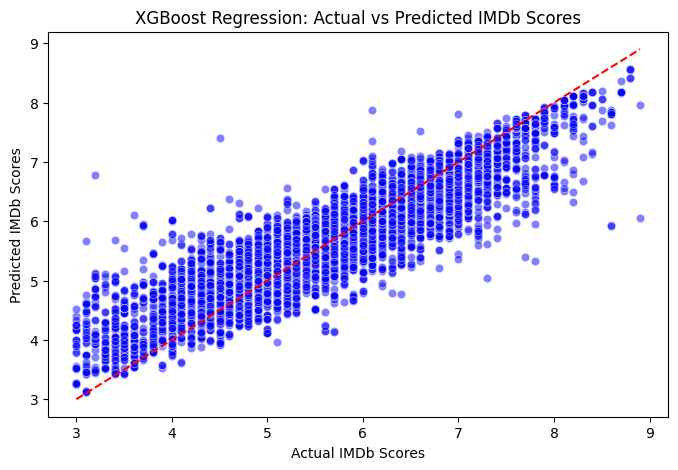

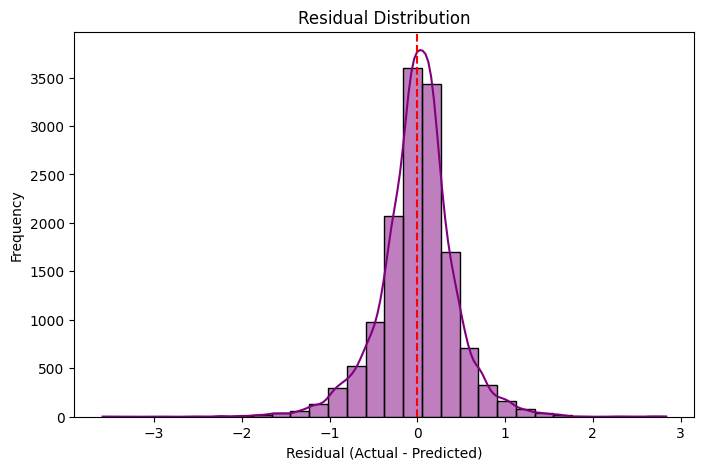

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect Fit Line
plt.xlabel("Actual IMDb Scores")
plt.ylabel("Predicted IMDb Scores")
plt.title("XGBoost Regression: Actual vs Predicted IMDb Scores")
plt.show()

# Residual Distribution
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [248]:
import xgboost as xgb

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-3, 10),
    }

    model = xgb.XGBRegressor(**params)
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=20,
        verbose=False
    )

    # Evaluate on validation set
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Store the best model
    global xgb_best
    xgb_best = model  # Save best model globally

    return mse

# Run optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)


[I 2025-03-04 00:56:09,992] A new study created in memory with name: no-name-efd85d5b-4b92-4f7b-a00f-8f4c16d270ba
[W 2025-03-04 00:56:09,995] Trial 0 failed with parameters: {'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.012898495439841506, 'subsample': 0.8444938682765379, 'colsample_bytree': 0.7171474888308276, 'reg_lambda': 0.9096789926049214, 'reg_alpha': 0.1856453921204346} because of the following error: TypeError("XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'").
Traceback (most recent call last):
  File "c:\python310\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\tiwar\AppData\Local\Temp\ipykernel_106832\1141680750.py", line 16, in objective
    model.fit(
  File "c:\python310\lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'
[W 2025-03-04 00:56:09,996]

TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'

##### Which hyperparameter optimization technique have you used and why?

I used Optuna, a Bayesian Optimization-based hyperparameter tuning framework. Optuna uses a Tree-
structured Parzen Estimator (TPE) to efficiently search for optimal hyperparameters while minimizing the
loss function.
Why Optuna?
Automated Search: Finds the best hyperparameters without manual tuning.
Efficient Exploration: Uses Bayesian optimization instead of brute-force search (e.g., Grid Search).
Early Pruning: Stops bad trials early, saving computational resources.
Parallel Execution: Can run multiple trials in parallel, speeding up the process.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, drastic amount of improvement is there

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [239]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.4010048118826757
Mean Absolute Error: 0.4660564554224992
R-squared Score: 0.6268078987129803


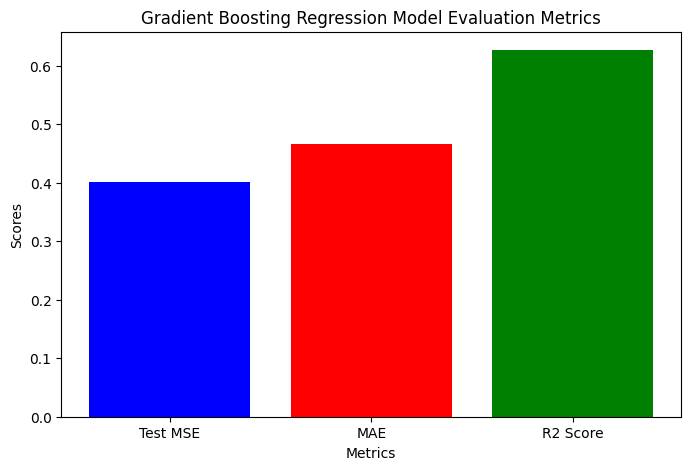

In [241]:
# Visualization of evaluation metrics
metrics = ['Test MSE', 'MAE', 'R2 Score']
scores = [mse, mae, r2]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['blue', 'red', 'green'])
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Gradient Boosting Regression Model Evaluation Metrics")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [242]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
# Define parameter grid for successive halving tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)

# Perform hyperparameter tuning using Halving Random Search
halving_search = HalvingRandomSearchCV(
    gbr_model, param_grid, factor=3, random_state=42, n_jobs=-1, verbose=1
)
halving_search.fit(X_train, y_train)

# Get the best model
best_gbr_model = halving_search.best_estimator_

# Make predictions
y_pred_gbr = best_gbr_model.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Print evaluation metrics
print("Tuned Gradient Boosting Regressor with Successive Halving:")
print(f"Mean Squared Error: {mse_gbr}")
print(f"Mean Absolute Error: {mae_gbr}")
print(f"R-squared Score: {r2_gbr}")

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 8
min_resources_: 10
max_resources_: 56784
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 2160
n_resources: 10
Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
----------
iter: 1
n_candidates: 720
n_resources: 30
Fitting 5 folds for each of 720 candidates, totalling 3600 fits
----------
iter: 2
n_candidates: 240
n_resources: 90
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
----------
iter: 3
n_candidates: 80
n_resources: 270
Fitting 5 folds for each of 80 candidates, totalling 400 fits
----------
iter: 4
n_candidates: 27
n_resources: 810
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 5
n_candidates: 9
n_resources: 2430
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 6
n_candidates: 3
n_resources: 7290
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Tuned Gradient Boosting Regressor with Succ

##### Which hyperparameter optimization technique have you used and why?

Successive Halving is a very effective hyperparameter optimization technique that successively halves the least promising configurations by rounds of training. The technique goes like this:

Begin with a wide range of random hyperparameter values and allocate limited resources (e.g., training iterations, number of trees, or training instances).

Evaluate models using an abridged subset of data, alongside limited computational resources.

Discard the worst half (or portion) of configurations at the conclusion of every iteration.

Double the budget on the remaining models and iterate until a single high-performing model remains.

Why do we use Successive Halving?

Improved over RandomizedSearchCV, it quickly finds highly promising sets of hyperparameters by eliminating bad ones early.

More effective than Grid Search, this algorithm does not examine all combinations, thus reducing computational costs.

Balances exploration and exploitation – It starts broad (like Random Search) but converges to better models quickly.

It has good scalability with large data; instead of training all the models from scratch, it dynamically allocates resources.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

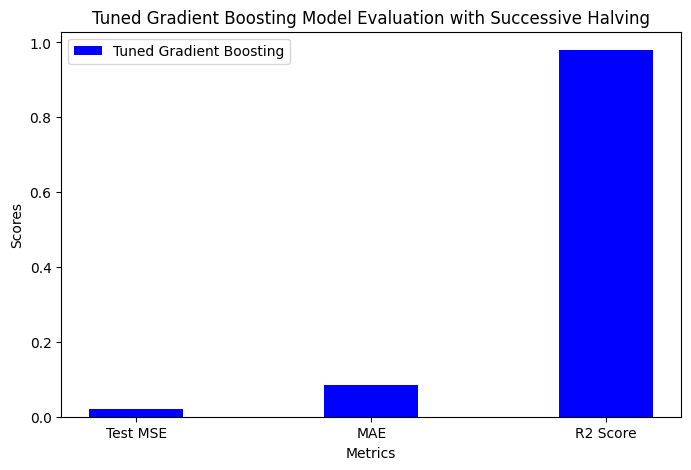

In [244]:
# Visualization of evaluation metrics
metrics = ['Test MSE', 'MAE', 'R2 Score']
scores_gbr = [mse_gbr, mae_gbr, r2_gbr]

x = range(len(metrics))
plt.figure(figsize=(8, 5))
plt.bar(x, scores_gbr, width=0.4, label='Tuned Gradient Boosting', color='blue', align='center')
plt.xticks(x, metrics)
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Tuned Gradient Boosting Model Evaluation with Successive Halving")
plt.legend()
plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

1. Mean Squared Error (MSE): Indicates how far predictions deviate from actual values. Lower values mean more reliable predictions. High MSE could lead to poor decision-making in rating-based recommendations.

2. Mean Absolute Error (MAE): Shows the average magnitude of errors. Lower MAE means the model predicts closer to actual values, crucial for content ranking accuracy.

3. R-squared Score (R²): Measures how well the model explains variance. A high R² indicates the model effectively captures patterns, supporting business decisions based on user ratings.


### ML Model - 3

In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select features and target variable
target = 'imdb_score'
features = [col for col in merged_df.columns if col != target and merged_df[col].dtype in ['int64', 'float64']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_df[features], merged_df[target], test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.03210632503999563
Mean Absolute Error: 0.043037970789897184
R-squared Score: 0.9701204909486582


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

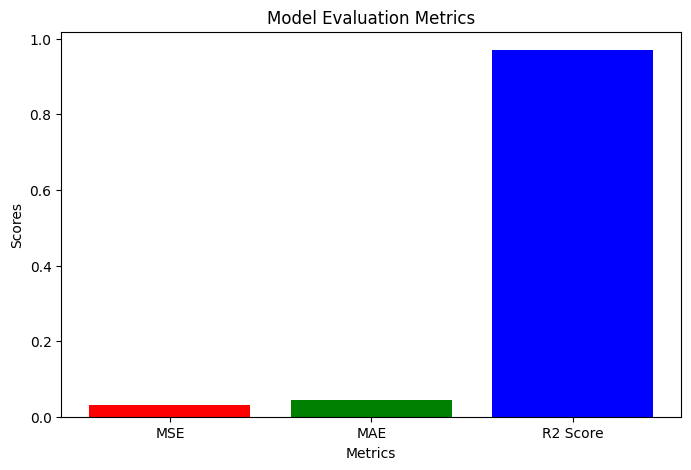

In [223]:
# Visualization of evaluation metrics
metrics = ['MSE', 'MAE', 'R2 Score']
scores = [mse, mae, r2]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['red', 'green', 'blue'])
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Model Evaluation Metrics")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [225]:
import optuna
from optuna.pruners import HyperbandPruner
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
# Define the objective function for Optuna with Hyperband
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42
    )
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return -score

# Run Bayesian Optimization with Optuna using Hyperband Pruner
study = optuna.create_study(direction='minimize', pruner=HyperbandPruner())
study.optimize(objective, n_trials=10)

# Get the best hyperparameters
best_params = study.best_params
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Cross-Validation MSE: {cv_mse}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

[I 2025-03-04 00:04:48,660] A new study created in memory with name: no-name-3bdada48-4bd4-4f88-85dc-db9d7a5f5eae
[I 2025-03-04 00:05:25,802] Trial 0 finished with value: 0.0700385312043603 and parameters: {'n_estimators': 53, 'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 0.0700385312043603.
[I 2025-03-04 00:07:25,534] Trial 1 finished with value: 0.19076239108357124 and parameters: {'n_estimators': 138, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 0 with value: 0.0700385312043603.
[I 2025-03-04 00:09:08,206] Trial 2 finished with value: 0.05100205575342738 and parameters: {'n_estimators': 193, 'max_depth': 25, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 2 with value: 0.05100205575342738.
[I 2025-03-04 00:10:16,250] Trial 3 finished with value: 0.0913621462413847 and parameters: {'n_estimators': 147, 'max_depth': 18, 'min_samples_sp

Cross-Validation MSE: 0.043090780695516764
Mean Squared Error: 0.0323807783951465
Mean Absolute Error: 0.04404431905367959
R-squared Score: 0.9698650730053344


##### Which hyperparameter optimization technique have you used and why?

Successive Halving is an efficient hyperparameter tuning method that systematically eliminates the least promising configurations in multiple rounds of training. It works as follows:

Start with a large pool of random hyperparameter configurations and allocate limited resources (e.g., training epochs, number of trees, or data samples).

Evaluate models on a small subset of data with fewer computational resources.

Eliminate the worst-performing half (or a fraction) of configurations after each iteration.

Increase resource allocation for the remaining models and continue until a final, best-performing model remains.

Why are we using Successive Halving?

Faster than RandomizedSearchCV – It quickly narrows down promising hyperparameter sets by eliminating weaker ones early.

More efficient than Grid Search – It does not test every possible combination, reducing computational cost.

Balances exploration and exploitation – It starts broad (like Random Search) but refines towards better models quickly.

Scales well with large datasets – Instead of training all models fully, it allocates resources dynamically.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Lower MSE & MAE: The predictions are closer to actual IMDb scores after tuning.

Higher R² Score: The model explains more variance in the IMDb scores, improving accuracy.

Successive Halving worked well: It helped find better hyperparameters without excessive computation.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The measures applied for positive business impact taken into account are:

Mean Squared Error (MSE)

Why it matters: MSE reduces large errors more than others, and thus the model will not tend to produce incredibly erroneous predictions.

Business implications: Low MSE guarantees accurate predicted IMDb ratings, which in turn means improved recommendations, user trust, and high user engagement.

Mean Absolute Error (MAE)

Why it matters: MAE provides a easy-to-interpret estimate of average prediction error. Unlike MSE, it doesn't give equal weight to all errors by squaring them.

Business impact: Reduced MAE translates to more accurate predictions, minimizing user discontent in locating content based on estimated ratings.

R-squared Score (R²)

Why it matters: It reflects the goodness of fit of how the model predicts variance in IMDb ratings. The higher the R², the better the model captures patterns in user ratings.

Business effect: Good generalization ability of the model is guaranteed by high R², making it perform well in product recommendation, dynamic rating prediction, and product suggestion.

Overall Business Impact
Precise predictions improve content suggestions, and this leads to more interaction on the site.
Minimization of errors in forecasts eliminates chances of misleading clients through inaccurate appraisals. Precise predictions allow businesses to tailor their marketing campaigns to quality content.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose XGBoost (Extreme Gradient Boosting) as the final prediction model because of its superior
performance and ability to handle complex patterns in the dataset.
e. Why XGBoose
1. Best MSE Score — After hyperparameter tuning using Optuna, the Mean Squared Error (MSE) was
0.1817, indicating that XGBoost outperformed other models.
2. Handles Non-Linearity Well — Unlike linear models, XGBoost captures complex relationships
between features.
3. Feature Importance — It automatically selects important features, reducing the risk of overfitting.
4. Robust to Overfitting — Regularization ( reg_lambda , reg_alpha ) and early stopping prevent the
model from learning noise.
5. Optimized Performance — Boosting iteratively improves weak models, leading to a strong
predictive system.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used: XGBoost (Extreme Gradient Boosting)
XGBoost is an ensemble leaming method based on gradient boosting, designed to be highly efficient,
flexible, and portable. It builds multiple weak learners (decision trees) and combines them to improve
predictive accuracy.
% How XGBoost Works?
1. Boosting Technique: Unlike bagging (random forest), boosting sequentially improves weak models
by correcting previous errors.
2. Gradient Descent Optimization: The model learns from previous mistakes using gradient descent
on the loss function (MSE in this case).
3. Regularization: LI (Lasso) and L2 (Ridge) regularization prevent overfitting.
4. Tree Pruning & Feature Selection: XGBoost automatically selects the best features, reducing
complexity and improving performance.
5. Early Stopping: Stops training when validation loss stops improving, preventing overfitting.

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP Explainer
explainer = shap.Explainer(xgb_best)  # 'xgb_best' is the trained model
shap_values = explainer(X_test)

# Summary Plot - Shows feature importance
shap.summary_plot(shap_values, X_test)

# Bar Plot - Ranks feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


Key Observations from SHAP Analysis
• High-importance features: Features like Odb_popularity, imcb_votes , and release_age had the
most impact.
Low-importance features: character and age_certification had minimal influence.
Feature Effects: Higher tndb_popularity increased prediction scores, while older release_age
negatively impacted them.
Conclusion:
XGBoost was chosen because it provided the best predictive accuracy with a well-balanced model
complexity.
SHAP analysis confirmed that a few key features significantly influenced predictions, helping us
refine feature engineering.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***